## Circuito ejemplo para la ejecución del producto privado 
OJO: Este circuito sirve para entender un poco el uso de las puertas y la "simulación" de las operaciones hechas en Alice y Bob:

$$(X(x_{a}^{A})Z(z_{a}^{A}) \otimes X(x_{b}^{B})Z(z_{b}^{B})) \left|\varphi_{00}\right>$$

1


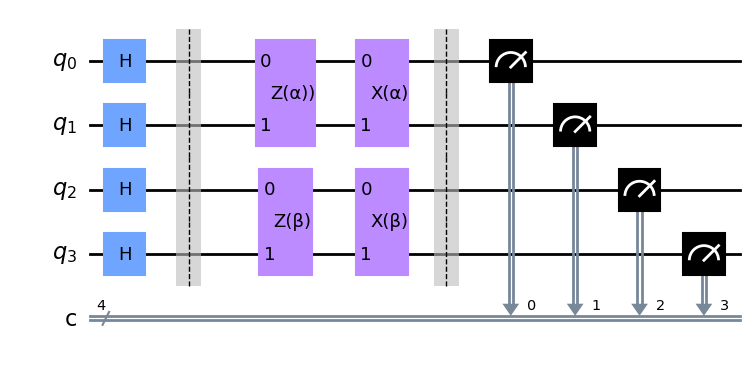

In [2]:
 # Importo todo de qiskit
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info.operators import Operator
from qiskit.quantum_info.states import Statevector
from funciones.encondings import encondings
from funciones.U_function import U_gate
from funciones.R_function import R_gate
import random


dim=4
alpha=2         # Raíz primitiva
beta=2          # Raíz primitiva
a=2
b=2
p=dim

# Elijo uno de los encodigs al azar
enconding = random.randint(1, 4)
# 

print(enconding)
Xa_A, Xb_B, Za_A, Zb_B = encondings(1, a, b, alpha, beta, dim, p)

# print(Xa_A)
# print(Xb_B)
# print(Za_A)
# print(Zb_B)

#Creo las 4 puertas X(alpha), Z(alpha), X(beta), Z(beta):
X_alpha = U_gate(dim, Xa_A)
Z_alpha = R_gate(dim, Za_A, p)
X_beta = U_gate(dim, Xb_B)
Z_beta = R_gate(dim, Zb_B, p)

# # Creo un circuito de con dim qubits y bits 
qc = QuantumCircuit(dim, dim)
qc.h(range(0,4))

qc.barrier()
qc.unitary(Z_alpha, [0,1], label="Z(α))")
qc.unitary(X_alpha, [0,1], label="X(α)")
qc.unitary(Z_beta, [2,3], label="Z(β)")
qc.unitary(X_beta, [2,3], label="X(β)")

qc.barrier()

qc.measure([0,1], [0,1])
qc.measure([2,3],[2,3])

qc.draw('mpl')